In [1]:
# from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import os
from Modulo import text_proc as txt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# count_vect = contVectorizer()
# x_counts = count_bect.fit_transform(np.array(x)) list of texts, each text is a string
# y = np.asrray(y)

# tdfif_transformer = tfidftransformer()
# x_tfidf = tfidf_transformer.fit_transform(x_counts)

# 2.xmlla etiqueta 1-5
# 2.review.pos --> texto lemmatizado --> eliminar los tokens que son stopwords y signos de puntuación-->

Obtenemos los archivos con los que vamos a trabajar, en este caso los review.pos y los archivos .xml

In [2]:
path = './corpusCriticasCine/'

# Obtenemos una lista con todos los archivos en el corpus y los dividimos en x, y
name_files = os.listdir(path)
pos_file = list(filter(lambda x: x.endswith('.review.pos'), name_files))
xml_file = list(filter(lambda x: x.endswith('.xml'), name_files))

# Comparamos los archivos para obtener la misma longitud
x, y = txt.obtener_y(path, pos_file, xml_file)       
print('x_file:', len(x),'\nY:', len(y))

x_file: 3878 
Y: 3878


In [3]:
text_clean =[txt.normalizar(x[i]) for i in range(len(x))]

In [4]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(np.array(text_clean)) #list of texts, each text is a string
y = np.asarray(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_counts, y, test_size=0.2, shuffle = True, random_state=0)

### Multinomial unicamente usando el vector de CountVectorizer

In [6]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))


0.45103092783505155


#### Matriz de confusion y f1 con datos de prueba

              precision    recall  f1-score   support

           1       0.43      0.04      0.08        72
           2       0.48      0.42      0.45       199
           3       0.44      0.72      0.54       247
           4       0.44      0.41      0.43       169
           5       0.53      0.18      0.27        89

    accuracy                           0.45       776
   macro avg       0.46      0.35      0.35       776
weighted avg       0.46      0.45      0.42       776

[[ 16  40  29   4   0]
 [  9  70  79  11   0]
 [  3  36 178  29   1]
 [  2   9 102  83   3]
 [  0   4  19  46   3]]


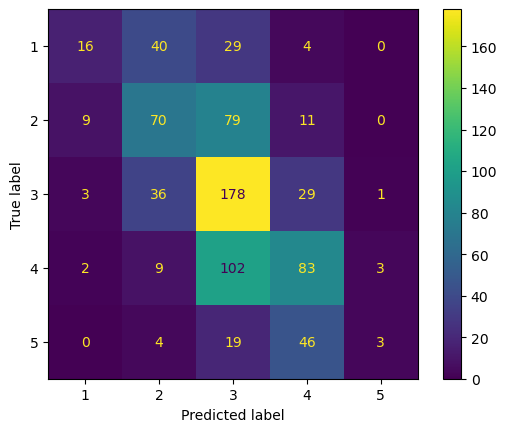

In [7]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

### Matriz de confusión con datos de entrenamiento

In [8]:
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))


0.8939393939393939


              precision    recall  f1-score   support

           1       1.00      0.50      0.67       279
           2       0.89      0.94      0.92       724
           3       0.84      0.99      0.91      1006
           4       0.92      0.93      0.93       721
           5       1.00      0.76      0.86       372

    accuracy                           0.89      3102
   macro avg       0.93      0.82      0.86      3102
weighted avg       0.90      0.89      0.89      3102

[[282  41  45   4   0]
 [  0 673  46   2   0]
 [  1   8 995   2   0]
 [  0   6  34 684   0]
 [  0   5  58  77 139]]


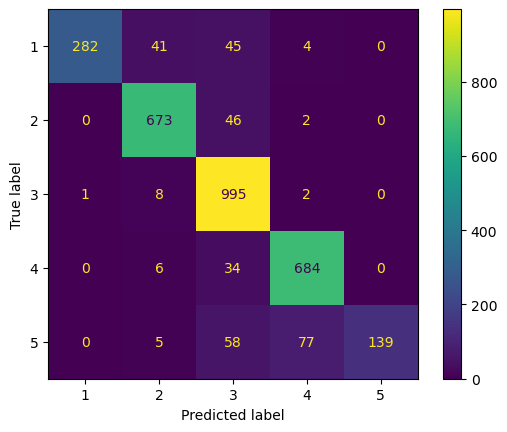

In [9]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Lr con metodo Count Vectorizer


In [10]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_predict = logisticRegr.predict(X_test)
print(accuracy_score(y_test, y_predict))


0.43943298969072164


c:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Matriz de confusion con datos de Prueba

              precision    recall  f1-score   support

           1       0.48      0.31      0.37        72
           2       0.45      0.48      0.46       199
           3       0.45      0.49      0.47       247
           4       0.38      0.40      0.39       169
           5       0.49      0.42      0.45        89

    accuracy                           0.44       776
   macro avg       0.45      0.42      0.43       776
weighted avg       0.44      0.44      0.44       776

[[ 37  25  17   8   2]
 [ 25  67  55  21   1]
 [  7  62 120  53   5]
 [  5  15  68  95  16]
 [  1   6   9  34  22]]


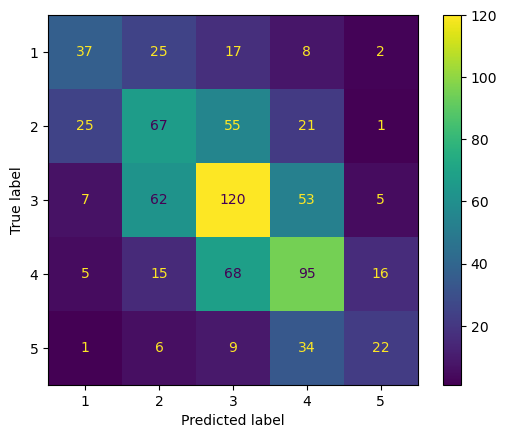

In [11]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Matriz de confusion con datos de entrenamiento

In [12]:
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train, y_train)
y_predict = logisticRegr.predict(X_train)
print(accuracy_score(y_train, y_predict))

0.9996776273372018


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       279
           2       1.00      1.00      1.00       724
           3       1.00      1.00      1.00      1006
           4       1.00      1.00      1.00       721
           5       1.00      1.00      1.00       372

    accuracy                           1.00      3102
   macro avg       1.00      1.00      1.00      3102
weighted avg       1.00      1.00      1.00      3102

[[ 372    0    0    0    0]
 [   0  721    0    0    0]
 [   0    0 1006    0    0]
 [   0    0    0  724    0]
 [   0    0    0    1  278]]


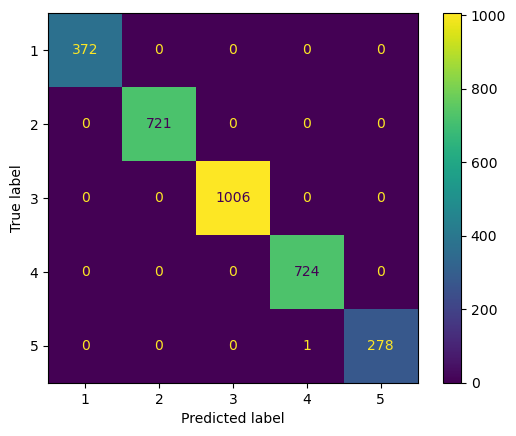

In [13]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# KNN con metodo Count Vectorizer

c:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9996776273372018
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       279
           2       1.00      1.00      1.00       724
           3       1.00      1.00      1.00      1006
           4       1.00      1.00      1.00       721
           5       1.00      1.00      1.00       372

    accuracy                           1.00      3102
   macro avg       1.00      1.00      1.00      3102
weighted avg       1.00      1.00      1.00      3102

[[ 372    0    0    0    0]
 [   0  721    0    0    0]
 [   0    0 1006    0    0]
 [   0    0    0  724    0]
 [   0    0    0    1  278]]


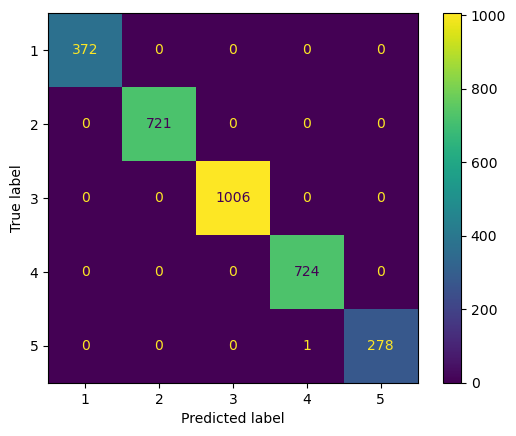

In [14]:
model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train, y_train)
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print(accuracy_score(y_train, y_predict))

target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Matriz de confusion con datos de prueba

# Matriz de confusion con datos de entrenamiento

c:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.4078014184397163
              precision    recall  f1-score   support

           1       0.24      0.68      0.35       279
           2       0.38      0.68      0.49       724
           3       0.55      0.41      0.47      1006
           4       0.64      0.18      0.28       721
           5       0.75      0.11      0.20       372

    accuracy                           0.41      3102
   macro avg       0.51      0.41      0.36      3102
weighted avg       0.53      0.41      0.39      3102

[[ 42  33  93 114  90]
 [  7 127 168 265 154]
 [  5  19 412 353 217]
 [  1  15  66 494 148]
 [  1   4  16  68 190]]


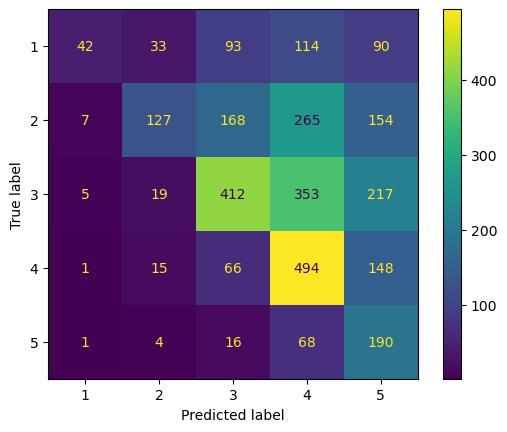

In [15]:
y_predict = model.predict(X_train)
print(accuracy_score(y_train, y_predict))

target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# k-medias con Count Vectorizer

# Matriz de confusion con datos de prueba

0.4078014184397163
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.11      0.56      0.18        72
           2       0.00      0.00      0.00       199
           3       0.36      0.13      0.19       247
           4       0.33      0.04      0.07       169
           5       0.00      0.00      0.00        89

    accuracy                           0.10       776
   macro avg       0.13      0.12      0.07       776
weighted avg       0.20      0.10      0.09       776

[[  0   7  10   1  35]
 [  0   7  19   0  70]
 [  0   2  32   0 121]
 [  0   4  19   0 105]
 [  0   1  10   0  40]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

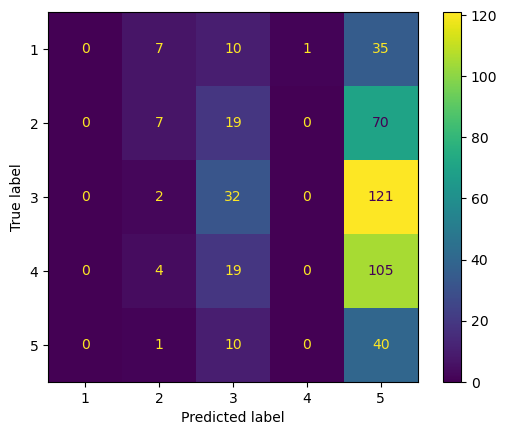

In [16]:
km = KMeans(n_clusters= 5).fit(X_train)
predicted= km.predict(X_test) # 0:Overcast, 2:Mild
print(accuracy_score(y_train, y_predict))

# target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Matriz de prueba con datos de entrenamiento

0.08897485493230174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.09      0.47      0.16       279
           2       0.00      0.00      0.00       724
           3       0.28      0.12      0.17      1006
           4       0.22      0.03      0.05       721
           5       0.00      0.00      0.00       372

    accuracy                           0.09      3102
   macro avg       0.10      0.10      0.06      3102
weighted avg       0.15      0.09      0.08      3102

[[  0  26  72   4 128]
 [  0  20 118   0 319]
 [  0  27 124   2 492]
 [  0  13  88   0 329]
 [  0   5  35   0 132]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

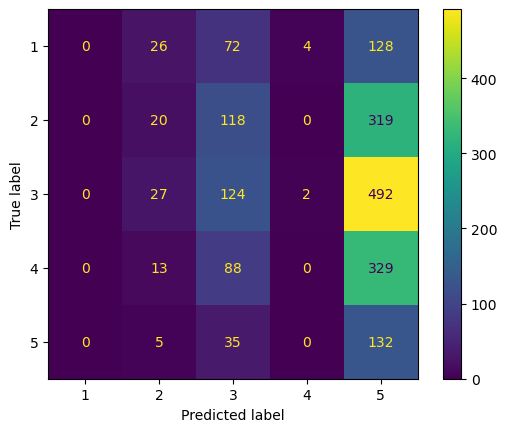

In [17]:
y_predict = km.predict(X_train)
print(accuracy_score(y_train, y_predict))

# target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

## Clasificados multinomial usando TfidfTRansform

In [18]:
tdfif_transformer = TfidfTransformer()
x_tfidf = tdfif_transformer.fit_transform(x_counts)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, shuffle = True, random_state=0)

In [20]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
    
# y_predict = clf.predict(X_test)

MultinomialNB()

### Matriz de confusion con datos de prueba

In [21]:
y_predict = clf.predict(X_test)

In [22]:
print(accuracy_score(y_test, y_predict))

0.31958762886597936


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        72
           2       1.00      0.01      0.01       199
           3       0.32      1.00      0.48       247
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00        89

    accuracy                           0.32       776
   macro avg       0.26      0.20      0.10       776
weighted avg       0.36      0.32      0.16       776

[[  0   0  89   0   0]
 [  0   0 169   0   0]
 [  0   0 247   0   0]
 [  0   0 198   1   0]
 [  0   0  72   0   0]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


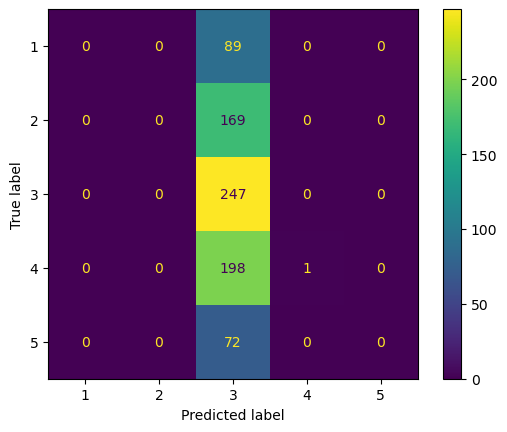

In [23]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

### Matriz de confusión, usando datos de entrenamiento

In [24]:
y_predict = clf.predict(X_train)

In [25]:
print(accuracy_score(y_train, y_predict))

0.33139909735654416


              precision    recall  f1-score   support

           1       1.00      0.00      0.01       279
           2       1.00      0.01      0.02       724
           3       0.33      1.00      0.49      1006
           4       1.00      0.02      0.04       721
           5       0.00      0.00      0.00       372

    accuracy                           0.33      3102
   macro avg       0.67      0.21      0.11      3102
weighted avg       0.66      0.33      0.17      3102

[[   0    0  372    0    0]
 [   0   13  708    0    0]
 [   0    0 1006    0    0]
 [   0    0  716    8    0]
 [   0    0  278    0    1]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


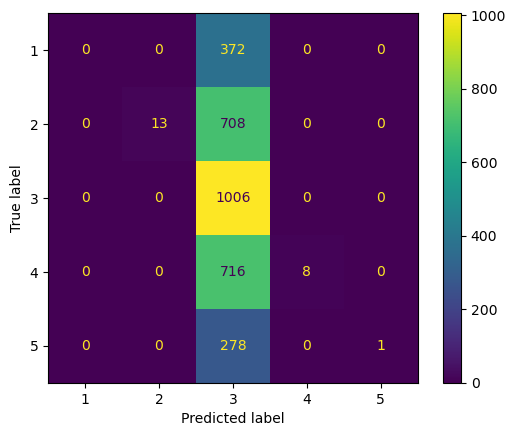

In [26]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Lr con tfidfTransformer

In [27]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_predict = logisticRegr.predict(X_test)
print(accuracy_score(y_test, y_predict))


0.4368556701030928


# Matriz de confusion con datos de Prueba

              precision    recall  f1-score   support

           1       1.00      0.01      0.03        72
           2       0.48      0.45      0.46       199
           3       0.42      0.76      0.54       247
           4       0.39      0.33      0.36       169
           5       0.75      0.07      0.12        89

    accuracy                           0.44       776
   macro avg       0.61      0.32      0.30       776
weighted avg       0.52      0.44      0.39       776

[[  6  41  36   6   0]
 [  2  56 101  10   0]
 [  0  32 187  28   0]
 [  0   9 101  89   0]
 [  0   4  15  52   1]]


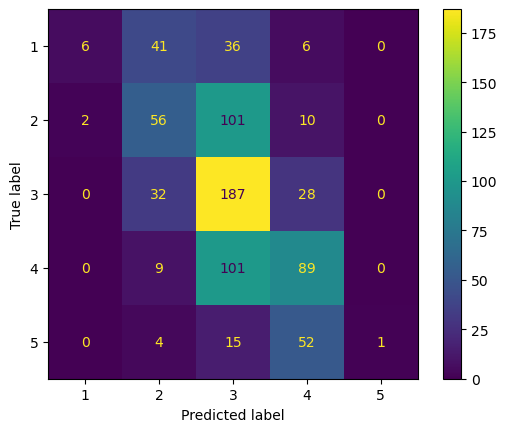

In [28]:
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, y_predict, target_names=target_names))
cm = confusion_matrix(y_test, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Matriz de confusion con datos de Entrenamiento

0.8881366860090264
              precision    recall  f1-score   support

           1       1.00      0.52      0.69       279
           2       0.88      0.96      0.92       724
           3       0.84      0.99      0.91      1006
           4       0.92      0.92      0.92       721
           5       1.00      0.69      0.82       372

    accuracy                           0.89      3102
   macro avg       0.93      0.82      0.85      3102
weighted avg       0.90      0.89      0.88      3102

[[258  45  64   5   0]
 [  0 664  55   2   0]
 [  0   5 995   6   0]
 [  0   7  25 692   0]
 [  0   3  52  78 146]]


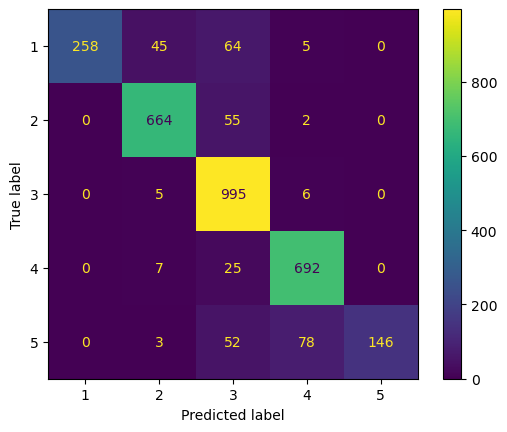

In [29]:
y_predict = logisticRegr.predict(X_train)
print(accuracy_score(y_train, y_predict))
target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# KNN con TFidfTransformer

c:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8881366860090264
              precision    recall  f1-score   support

           1       0.29      0.32      0.31        72
           2       0.37      0.34      0.35       199
           3       0.37      0.47      0.41       247
           4       0.34      0.28      0.31       169
           5       0.32      0.25      0.28        89

    accuracy                           0.35       776
   macro avg       0.34      0.33      0.33       776
weighted avg       0.35      0.35      0.35       776

[[ 22  23  30   7   7]
 [ 27  48  63  28   3]
 [  9  49 115  55  19]
 [  9  15  82  67  26]
 [  1   6  19  23  23]]


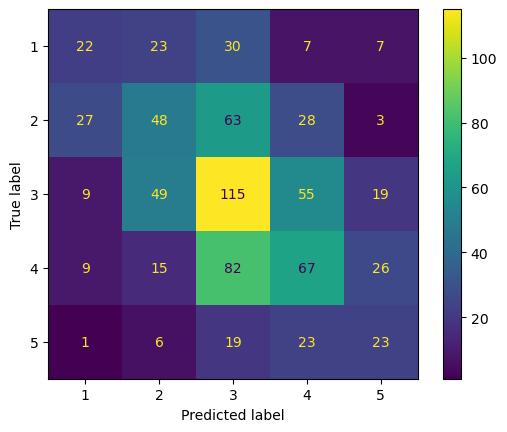

In [30]:
model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train, y_train)
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print(accuracy_score(y_train, y_predict))

target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, predicted, target_names=target_names))


cm = confusion_matrix(y_test, predicted, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Matriz de confusion con datos de entrenamiento

c:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5789813023855577
              precision    recall  f1-score   support

           1       0.49      0.57      0.53       279
           2       0.61      0.61      0.61       724
           3       0.58      0.68      0.63      1006
           4       0.58      0.47      0.52       721
           5       0.57      0.44      0.50       372

    accuracy                           0.58      3102
   macro avg       0.57      0.56      0.56      3102
weighted avg       0.58      0.58      0.58      3102

[[164  89  78  27  14]
 [ 53 341 228  71  28]
 [ 32 104 687 133  50]
 [ 26  46 136 445  71]
 [ 12   7  53  48 159]]


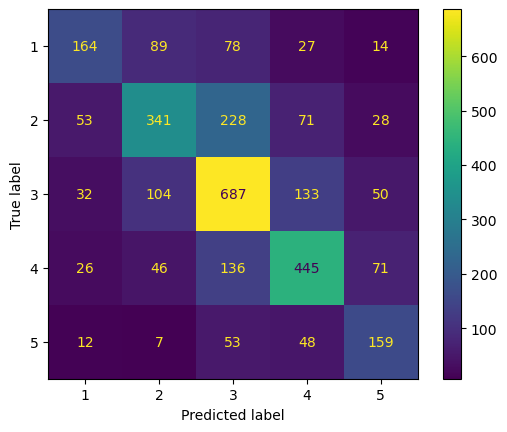

In [31]:
y_predict = model.predict(X_train)
print(accuracy_score(y_train, y_predict))

target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict, target_names=target_names))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# K-medias con TfidfTransform

0.5789813023855577
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.14      0.54      0.22        72
           2       0.30      0.33      0.31       199
           3       0.35      0.04      0.08       247
           4       0.30      0.43      0.35       169
           5       0.00      0.00      0.00        89

    accuracy                           0.24       776
   macro avg       0.18      0.22      0.16       776
weighted avg       0.27      0.24      0.20       776

[[ 0 43  3 23 20]
 [ 0 72 10 43 44]
 [ 0 81 11 65 88]
 [ 0 39  6 65 87]
 [ 0  9  1 23 39]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

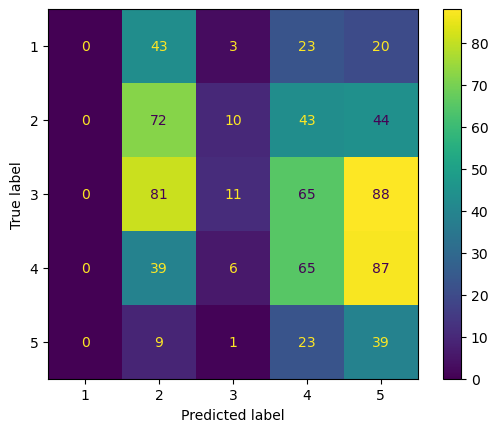

In [32]:
km = KMeans(n_clusters= 5).fit(X_train)
predicted= km.predict(X_test) # 0:Overcast, 2:Mild
print(accuracy_score(y_train, y_predict))

# target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

# Matriz de confusion con datos de entrenamiento

0.22404900064474534
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.13      0.46      0.20       279
           2       0.25      0.33      0.28       724
           3       0.30      0.04      0.08      1006
           4       0.29      0.40      0.34       721
           5       0.00      0.00      0.00       372

    accuracy                           0.22      3102
   macro avg       0.16      0.20      0.15      3102
weighted avg       0.23      0.22      0.19      3102

[[  0 168  27 100  76]
 [  0 285  39 211 178]
 [  0 327  45 300 323]
 [  0 159  31 237 294]
 [  0  32   9 109 128]]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

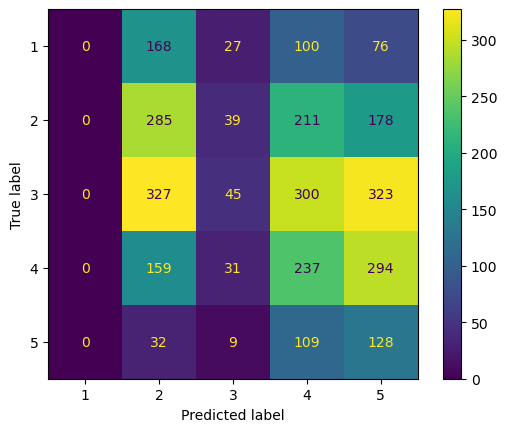

In [33]:
y_predict = km.predict(X_train)
print(accuracy_score(y_train, y_predict))

# target_names = list(map(str, [1,2,3,4,5]))
print(classification_report(y_train, y_predict))
cm = confusion_matrix(y_train, y_predict, labels=[5,4,3,2,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()